In [1]:
import astropy
from astropy.io import fits 
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from astropy.time import Time
from astropy.table import Table
from astropy.visualization import quantity_support

In [2]:
file = '/Users/katborski/Documents/GitHub/AFPSC/TESS/tess2021232031932-s0042-0000000250081915-0213-a_fast-lc.fits'
data = astropy.io.fits.open(file)

In [3]:
#with fits.open(file, mode="readonly") as hdulist:
#    tess_bjds = hdulist[1].data['TIME']
#    pdcsap_fluxes = hdulist[1].data['PDCSAP_FLUX']

#plt.figure(figsize = (16,4))
#plt.xlim(2448.7,2449)
#plt.plot(tess_bjds, pdcsap_fluxes)
#plt.show()

In [4]:
with fits.open(file, mode="readonly") as hdulist:
    tess_times = hdulist[1].data['TIME']
    tess_flux = hdulist[1].data['PDCSAP_FLUX']

In [5]:
#t = np.where(np.isfinite(tess_times))
#f = np.where(np.isfinite(tess_flux))

In [6]:
#table = Table([tess_times,tess_flux], names=("TIME","FLUX"))
#flux = table["FLUX"]
#time = table["TIME"]
#print(table)

In [7]:
arr = np.vstack((tess_times, tess_flux))
arr

array([[2447.68999325, 2447.69022474, 2447.69045624, ..., 2473.1654577 ,
        2473.16568918, 2473.16592066],
       [          nan,           nan,           nan, ...,           nan,
                  nan,           nan]])

In [8]:
plot = arr[:, ~np.isnan(arr).any(axis=0)]

In [9]:
x = plot[0]
x

array([2447.69578054, 2447.69601203, 2447.69624352, ..., 2470.83605715,
       2470.83628863, 2470.83652011])

In [10]:
y = plot[1]
y

array([4178.15673828, 4193.41992188, 4184.61328125, ..., 4188.24169922,
       4175.39599609, 4178.83740234])

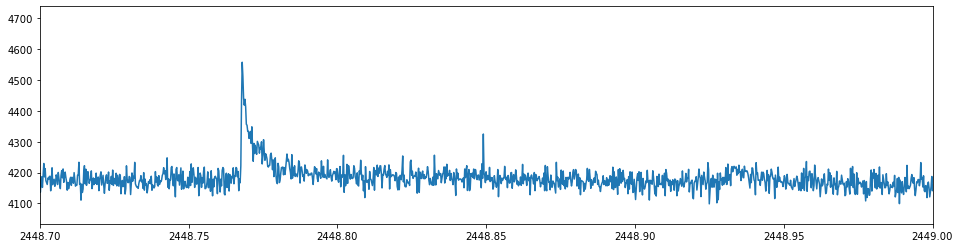

In [11]:
plt.figure(figsize=(16,4))
plt.xlim(2448.7,2449)
plt.plot(x,y)

In [48]:
times=[]
for i in x:
    r = i + 2457000
    times.append(r)
p = Time(times, format = 'jd', scale = 'utc')

In [42]:
p.format = 'iso'
p

<Time object: scale='utc' format='iso' value=['2021-08-21 04:41:55.439' '2021-08-21 04:42:15.439'
 '2021-08-21 04:42:35.440' ... '2021-09-13 08:03:55.338'
 '2021-09-13 08:04:15.338' '2021-09-13 08:04:35.338']>

ConversionError: Failed to convert value(s) to axis units: <Time object: scale='utc' format='iso' value=['2021-08-21 04:41:55.439' '2021-08-21 04:42:15.439'
 '2021-08-21 04:42:35.440' ... '2021-09-13 08:03:55.338'
 '2021-09-13 08:04:15.338' '2021-09-13 08:04:35.338']>

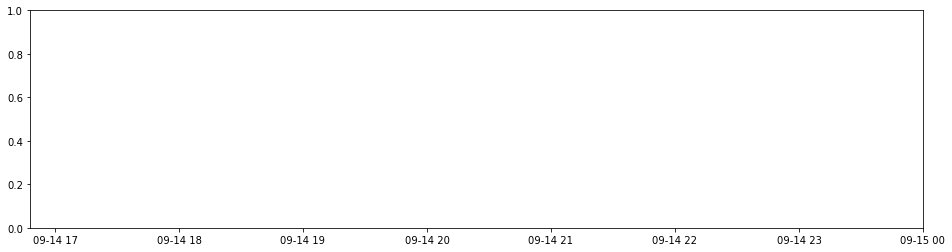

In [46]:
plt.figure(figsize=(16,4))
plt.xlim(2448.7,2449)
plt.plot_date(p,y)